#CSE1015 J Comp

#Preprocessing

In [7]:
import warnings
warnings.filterwarnings('ignore')

####Importing the dataset

In [8]:
!git clone https://github.com/Arjun-V-K-20BAI1182/CSE1015_J_Comp

Cloning into 'CSE1015_J_Comp'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import re

####JSON to dataframe conversion

In [10]:
with open('/content/CSE1015_J_Comp/fake_news-all.json') as f:
  fake_news = json.load(f)
  fake_news = pd.json_normalize(fake_news,'fake_news')
  f.close()

In [11]:
fake_news

,url,short_description,full_title,long_description
0,https://hindi.boomlive.in/fact-check/imran-kha...,बूम ने पाया कि इमरान खान भारत सरकार की आलोचना ...,इमरान खान के क्रॉप्ड वीडियो का दावा- भारत में ...,A video is viral with the claim that Pakistan ...
1,https://hindi.boomlive.in/fact-check/hindi-imp...,सिख समुदाय के कुछ लोगों को हिंदी साइन बोर्ड पर...,हिंदी में लिखे साइन बोर्ड पर कालिख पोतने की ये...,सिख समुदाय के कुछ लोगों को हिंदी साइन बोर्ड पर...
2,https://hindi.boomlive.in/fact-check/pm-narend...,सोशल मीडिया प्लेटफ़ॉर्म फ़ेसबुक और ट्विटर पर इस ...,जनसंख्या नियंत्रण क़ानून के दावे के साथ पीएम मो...,प्रधानमंत्री नरेंद्र मोदी की एक़ तस्वीर सोशल मी...
3,https://hindi.boomlive.in/fact-check/rajnath-s...,दावा है कि भाजपा के नेताओं ने माना है कि सरकार...,राजनाथ सिंह का दो साल पुराना वीडियो फिर हुआ वायरल,NaN
4,https://hindi.boomlive.in/fact-check/balakot-s...,मीडिया आउटलेट्स और वायर एजेंसी ने गलत तरीके से...,"ए.एन.आई, अन्य मीडिया संस्थानों ने बालाकोट पर क...",न्यूज़ संस्थान एशियन न्यूज़ इंटरनेशनल के साथ साथ...
...,...,...,...,...
1245,https://hindi.boomlive.in/%E0%A4%AD%E0%A4%BE%E...,भारतीय पहलवान कविता देवी और बुल बुल के बीच हुए...,आरएसएस Vs पाकिस्तान: भारतीय महिला पहलवान कविता...,सोशल मीडिया पर एक फ्री स्टाइल महिला पहलवान का ...
1246,https://hindi.boomlive.in/%E0%A4%85%E0%A4%B8%E...,बूम से बात करते हुए एसबीआई अधिकारी ने बताया कि...,असम में एसबीआई एटीएम के नोटों को चूहों ने किया...,एटीएम मशीन के अंदर फटे नोटों की ये तस्वीर व्हा...
1247,https://hindi.boomlive.in/%E0%A4%AA%E0%A5%87%E...,बीजेपी सांसद परेश रावल एक बार फिर अपने फेक न्य...,पेट्रोल की कीमतों पर राहुल गांधी का फ़ेक ट्विट ...,अभिनेता से सांसद बने परेश रावल ट्विटर पर फेक न...
1248,https://hindi.boomlive.in/%E0%A4%95%E0%A4%B0%E...,मार्च से लेकर मई महीने में अचानक से एक्टिव हुई...,कर्नाटका चुनावों के दौरान एक्टिव फ़ेक न्यूज़ वेब...,कर्नाटक चुनाव के दौर में जो ढेरों वेबसाइटस देख...


In [12]:
with open('/content/CSE1015_J_Comp/true_news-all.json') as f:
  true_news = json.load(f)
  true_news = pd.json_normalize(true_news,'true_news')
  f.close()

In [13]:
true_news

,name,url,short_desc,full_title,long_description
0,मोहम्मद सिराज ने हाल में पिता को खो दिया था ले...,https://www.bbc.com/hindi/media-55737672,भारत ने ऑस्ट्रेलिया में टेस्ट सिरीज़ में ऐतिहा...,NaN,NaN
1,ब्रिसबेन टेस्ट का वो पल जब पुजारा के पापा डर ग...,https://www.bbc.com/hindi/media-55737709,ब्रिस्बेन टेस्ट में भारत की दीवार कहे जाने वाल...,NaN,NaN
2,पाकिस्तान के टीवी एंकर इक़रारुल हसन ने भारत की...,https://www.bbc.com/hindi/media-55737716,पाकिस्तानी टीवी प्रेजेंटर सैय्यद इक़रारुल हसन ...,NaN,NaN
3,कहां हुई थी पहली गणतंत्र दिवस परेड,https://www.bbc.com/hindi/india-38748043,किसी से पूछा जाए कि दिल्ली में पहली गणतंत्र दि...,26 जनवरी: गणतंत्र दिवस की पहली परेड कहां हुई थी,26 जनवरी: गणतंत्र दिवस की पहली परेड कहां हुई थ...
4,कार्टून: सख़्त ज़रूरत है,https://www.bbc.com/hindi/india-55735666,वेब सिरीज़ तांडव को लेकर जारी विवाद पर आज का क...,कार्टून: सख़्त ज़रूरत है,कार्टून: सख़्त ज़रूरत है\n4 घंटे पहले\nइमेज स्...
...,...,...,...,...,...
888,ब्रह्मोस एक्सटेंडड रेंज सुपरसोनिक क्रूज़ मिसाइ...,https://www.bbc.com/hindi/media-54552314,ये मिसाइल 400 किलोमीटर से ज़्यादा मार कर सकती है.,NaN,NaN
889,भोलू पहलवानों को भारत क्यों नहीं आने दिया था?,https://www.bbc.com/hindi/media-54552290,"आकर्षण का केंद्र वो शक्तिशाली पहलवान होते थे, ...",NaN,NaN
890,बिहार: जातीय समीकरणों और बीजेपी के हिंदुत्व का...,https://www.bbc.com/hindi/india-54544192,"बिहार के जातिगत समीकरणों की बात बहुत होती है, ...",NaN,NaN
891,स्टेन स्वामी: सबसे बुजुर्ग शख़्स जिन पर लगा आत...,https://www.bbc.com/hindi/india-54520759,एनआईए ने 83 साल के फ़ादर स्टेन स्वामी को गिरफ़...,NaN,NaN


####Dropping Null Values

url                  0
short_description    0
full_title           5
long_description     9
dtype: int64


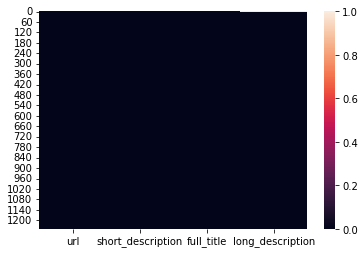

In [14]:
print(fake_news.isnull().sum(axis = 0))
sns.heatmap(fake_news.isnull())
plt.show()

name                  0
url                 120
short_desc          133
full_title          450
long_description    450
dtype: int64


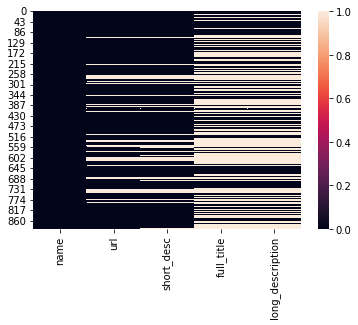

In [15]:
print(true_news.isnull().sum(axis = 0))
sns.heatmap(true_news.isnull())
plt.show()

Long_description and full_title contains a lot of null values. So they will be dropped.



Name column is not present in fake_news dataset. So it will be dropped too.

The url column is not actual information about the news, so it is dropped.

Therefore only the short description will be taken for training the model.

In [16]:
fake_news = fake_news[['short_description']]
true_news = true_news[['short_desc']]
true_news.rename(columns = {'short_desc':'short_description'}, inplace = True)


fake_news.dropna(axis = 0, inplace = True)
true_news.dropna(axis = 0, inplace = True)

In [17]:
fake_news

,short_description
0,बूम ने पाया कि इमरान खान भारत सरकार की आलोचना ...
1,सिख समुदाय के कुछ लोगों को हिंदी साइन बोर्ड पर...
2,सोशल मीडिया प्लेटफ़ॉर्म फ़ेसबुक और ट्विटर पर इस ...
3,दावा है कि भाजपा के नेताओं ने माना है कि सरकार...
4,मीडिया आउटलेट्स और वायर एजेंसी ने गलत तरीके से...
...,...
1245,भारतीय पहलवान कविता देवी और बुल बुल के बीच हुए...
1246,बूम से बात करते हुए एसबीआई अधिकारी ने बताया कि...
1247,बीजेपी सांसद परेश रावल एक बार फिर अपने फेक न्य...
1248,मार्च से लेकर मई महीने में अचानक से एक्टिव हुई...


In [18]:
true_news

,short_description
0,भारत ने ऑस्ट्रेलिया में टेस्ट सिरीज़ में ऐतिहा...
1,ब्रिस्बेन टेस्ट में भारत की दीवार कहे जाने वाल...
2,पाकिस्तानी टीवी प्रेजेंटर सैय्यद इक़रारुल हसन ...
3,किसी से पूछा जाए कि दिल्ली में पहली गणतंत्र दि...
4,वेब सिरीज़ तांडव को लेकर जारी विवाद पर आज का क...
...,...
887,चालक ने कार रोकने के बजाय उसे चलाना जारी रखा. ...
888,ये मिसाइल 400 किलोमीटर से ज़्यादा मार कर सकती है.
889,"आकर्षण का केंद्र वो शक्तिशाली पहलवान होते थे, ..."
890,"बिहार के जातिगत समीकरणों की बात बहुत होती है, ..."


####Removing Special Characters

In [19]:
for i in list(fake_news):
  fake_news[i]=fake_news[i].str.replace('|', '')
  fake_news[i]=fake_news[i].str.replace('?', '')
  fake_news[i]=fake_news[i].str.replace(':', '')
  fake_news[i]=fake_news[i].str.replace(';', '')
  fake_news[i]=fake_news[i].str.replace("'", '')
  fake_news[i]=fake_news[i].str.replace('"', '')
  fake_news[i]=fake_news[i].str.replace(',', '')
  fake_news[i]=fake_news[i].str.replace('.', '')
  fake_news[i]=fake_news[i].str.replace('(', '')
  fake_news[i]=fake_news[i].str.replace(')', '')
  fake_news[i]=fake_news[i].str.replace('\n', '')
  fake_news[i]=fake_news[i].str.replace('&', '')
  fake_news[i]=fake_news[i].str.replace('।', '')

In [20]:
for i in list(true_news):
  true_news[i]=true_news[i].str.replace('|', '')
  true_news[i]=true_news[i].str.replace('?', '')
  true_news[i]=true_news[i].str.replace(':', '')
  true_news[i]=true_news[i].str.replace(';', '')
  true_news[i]=true_news[i].str.replace("'", '')
  true_news[i]=true_news[i].str.replace('"', '')
  true_news[i]=true_news[i].str.replace(',', '')
  true_news[i]=true_news[i].str.replace('.', '')
  true_news[i]=true_news[i].str.replace('(', '')
  true_news[i]=true_news[i].str.replace(')', '')
  true_news[i]=true_news[i].str.replace('\n', '')
  true_news[i]=true_news[i].str.replace('&', '')

####Stemming

Stemming is the process of reducing a word to its word stem/root of the words.

Stemming is an imortant part of NLP. This allows the model to extract meaningful information from the data.

In [21]:
suffixes = {
    1: ["ो", "े", "ू", "ु", "ी", "ि", "ा"],
    2: ["कर", "ाओ", "िए", "ाई", "ाए", "ने", "नी", "ना", "ते", "ीं", "ती", "ता", "ाँ", "ां", "ों", "ें"],
    3: ["ाकर", "ाइए", "ाईं", "ाया", "ेगी", "ेगा", "ोगी", "ोगे", "ाने", "ाना", "ाते", "ाती", "ाता", "तीं", "ाओं", "ाएं", "ुओं", "ुएं", "ुआं"],
    4: ["ाएगी", "ाएगा", "ाओगी", "ाओगे", "एंगी", "ेंगी", "एंगे", "ेंगे", "ूंगी", "ूंगा", "ातीं", "नाओं", "नाएं", "ताओं", "ताएं", "ियाँ", "ियों", "ियां"],
    5: ["ाएंगी", "ाएंगे", "ाऊंगी", "ाऊंगा", "ाइयाँ", "ाइयों", "ाइयां"],
}

def stemHindi(word):
    for L in 5, 4, 3, 2, 1:
        if len(word) > L + 1:
            for suf in suffixes[L]:
                if word.endswith(suf):
                    return word[:-L]
    return word

In [22]:
id_fake=list(fake_news.index)
id_true=list(true_news.index)

In [23]:
str_temp=""
count=0
for i in list(fake_news):
  count=0
  for j in list(fake_news[i]):
    for words in j.split():
      str_temp+=stemHindi(words)
      str_temp+=" "
    fake_news.loc[id_fake[count],i]=str_temp
    str_temp=""
    count+=1

In [24]:
str_temp=""
count=0
for i in list(true_news):
  count=0
  for j in list(true_news[i]):
    for words in j.split():
      str_temp+=stemHindi(words)
      str_temp+=" "
    true_news.loc[id_true[count],i]=str_temp
    str_temp=""
    count+=1

In [25]:
fake_news

,short_description
0,बूम ने पाय कि इमरान खान भारत सरकार की आलोच कर ...
1,सिख समुदाय के कुछ लोग को हिंद साइन बोर्ड पर का...
2,सोशल मीडिय प्लेटफ़ॉर्म फ़ेसबुक और ट्विटर पर इस द...
3,दाव है कि भाजप के ने ने मा है कि सरकार जन के स...
4,मीडिय आउटलेट्स और वायर एजेंस ने गलत तरीक से दा...
...,...
1245,भारतीय पहलवान कवि देव और बुल बुल के बीच हुए कु...
1246,बूम से बात कर हुए एसबीआई अधिकार ने बत कि ये उन...
1247,बीजेप सांसद परेश रावल एक बार फिर अप फेक न्यूज ...
1248,मार्च से ले मई मही में अचानक से एक्टिव हुई फेक...


In [26]:
true_news

,short_description
0,भारत ने ऑस्ट्रेलिय में टेस्ट सिरीज़ में ऐतिहास...
1,ब्रिस्बेन टेस्ट में भारत की दीवार कह जा वाल चे...
2,पाकिस्ता टीव प्रेजेंटर सैय्यद इक़रारुल हसन अप ...
3,किस से पूछ जाए कि दिल्ल में पहल गणतंत्र दिवस प...
4,वेब सिरीज़ तांडव को ले जार विवाद पर आज का कार्...
...,...
887,चालक ने कार रोक के बजाय उस चल जार रख और एक ट्र...
888,ये मिसाइल 400 किलोमीटर से ज़्याद मार कर सक है
889,आकर्षण का केंद्र वो शक्तिशाल पहलवान हो थे जिनक...
890,बिहार के जातिगत समीकरण की बात बहुत हो है लेकिन...


####Removing Stop Words

Stop words are words that do not provide any meaningful information about the data and is present a lot in the data. Therefore, stop words are removed

In [27]:
stop = open('/content/CSE1015_J_Comp/stopwords_Hindi.txt')

In [28]:
stopwords=[]
for x in stop:
  x = x.replace('\n', '')
  stopwords.append(x)
stopwords

['मैं',
 'मुझको',
 'मेरा',
 'अपने आप को',
 'हमने',
 'हमारा',
 'अपना',
 'हम',
 'आप',
 'आपका',
 'तुम्हारा',
 'अपने आप',
 'स्वयं',
 'वह',
 'इसे',
 'उसके',
 'खुद को',
 'कि वह',
 'उसकी',
 'उसका',
 'खुद ही',
 'यह',
 'इसके',
 'उन्होने',
 'अपने',
 'क्या',
 'जो',
 'किसे',
 'किसको',
 'कि',
 'ये',
 'हूँ',
 'होता है',
 'रहे',
 'थी',
 'थे',
 'होना',
 'गया',
 'किया जा रहा है',
 'किया है',
 'है',
 'पडा',
 'होने',
 'करना',
 'करता है',
 'किया',
 'रही',
 'एक',
 'लेकिन',
 'अगर',
 'या',
 'क्यूंकि',
 'जैसा',
 'जब तक',
 'जबकि',
 'की',
 'पर',
 'द्वारा',
 'के लिए',
 'साथ',
 'के बारे में',
 'खिलाफ',
 'बीच',
 'में',
 'के माध्यम से',
 'दौरान',
 'से पहले',
 'के बाद',
 'ऊपर',
 'नीचे',
 'को',
 'से',
 'तक',
 'से नीचे',
 'करने में',
 'निकल',
 'बंद',
 'से अधिक',
 'तहत',
 'दुबारा',
 'आगे',
 'फिर',
 'एक बार',
 'यहाँ',
 'वहाँ',
 'कब',
 'कहाँ',
 'क्यों',
 'कैसे',
 'सारे',
 'किसी',
 'दोनो',
 'प्रत्येक',
 'ज्यादा',
 'अधिकांश',
 'अन्य',
 'में कुछ',
 'ऐसा',
 'में कोई',
 'मात्र',
 'खुद',
 'समान',
 'इसलिए',
 'बहुत',
 'सकता',
 '

In [29]:
from numpy import unicode
str_temp=""
count=0
for i in list(fake_news):
  count=0
  for j in list(fake_news[i]):
    for words in j.split():
      if unicode(words) not in stopwords:
        str_temp+=words
        str_temp+=" "
    fake_news.loc[id_fake[count],i]=str_temp
    str_temp=""
    count+=1

In [30]:
from numpy import unicode
str_temp=""
count=0
for i in list(true_news):
  count=0
  for j in list(true_news[i]):
    for words in j.split():
      if unicode(words) not in stopwords:
        str_temp+=words
        str_temp+=" "
    true_news.loc[id_true[count],i]=str_temp
    str_temp=""
    count+=1

####Combining Dataset

In [31]:
print("Fake news : ", len(fake_news))
print("True news : ", len(true_news))

Fake news :  1250
True news :  760


Have equal number of entries for both fake and true news

In [32]:
fake_news = fake_news.head(760)

In [33]:
true_news['label']=1
fake_news['label']=0
news = pd.concat([fake_news, true_news])

In [34]:
news

,short_description,label
0,बूम पाय इमरान खान भारत सरकार आलोच रह वर्तमान श...,0
1,सिख समुदाय के लोग हिंद साइन बोर्ड कालिख पोत दि...,0
2,सोशल मीडिय प्लेटफ़ॉर्म फ़ेसबुक ट्विटर दाव के बड़ ...,0
3,दाव भाजप के मा सरकार जन के गलत रह,0
4,मीडिय आउटलेट्स वायर एजेंस गलत तरीक दाव किय पाक...,0
...,...,...
887,चालक कार रोक के बजाय चल जार रख ट्रैफ़िक पुलिसक...,1
888,मिसाइल 400 किलोमीटर ज़्याद मार सक,1
889,आकर्षण केंद्र वो शक्तिशाल पहलवान जिनक संबंध प्...,1
890,बिहार के जातिगत समीकरण बात लंब बीजेप हिंद पहचा...,1


####Uploading the final dataset

In [35]:
news.to_csv("/content/CSE1015_J_Comp/final_news_dataset.csv")

In [36]:
news

,short_description,label
0,बूम पाय इमरान खान भारत सरकार आलोच रह वर्तमान श...,0
1,सिख समुदाय के लोग हिंद साइन बोर्ड कालिख पोत दि...,0
2,सोशल मीडिय प्लेटफ़ॉर्म फ़ेसबुक ट्विटर दाव के बड़ ...,0
3,दाव भाजप के मा सरकार जन के गलत रह,0
4,मीडिय आउटलेट्स वायर एजेंस गलत तरीक दाव किय पाक...,0
...,...,...
887,चालक कार रोक के बजाय चल जार रख ट्रैफ़िक पुलिसक...,1
888,मिसाइल 400 किलोमीटर ज़्याद मार सक,1
889,आकर्षण केंद्र वो शक्तिशाल पहलवान जिनक संबंध प्...,1
890,बिहार के जातिगत समीकरण बात लंब बीजेप हिंद पहचा...,1


In [37]:
x = news.short_description
x

0      बूम पाय इमरान खान भारत सरकार आलोच रह वर्तमान श...
1      सिख समुदाय के लोग हिंद साइन बोर्ड कालिख पोत दि...
2      सोशल मीडिय प्लेटफ़ॉर्म फ़ेसबुक ट्विटर दाव के बड़ ...
3                     दाव भाजप के मा सरकार जन के गलत रह 
4      मीडिय आउटलेट्स वायर एजेंस गलत तरीक दाव किय पाक...
                             ...                        
887    चालक कार रोक के बजाय चल जार रख ट्रैफ़िक पुलिसक...
888                   मिसाइल 400 किलोमीटर ज़्याद मार सक 
889    आकर्षण केंद्र वो शक्तिशाल पहलवान जिनक संबंध प्...
890    बिहार के जातिगत समीकरण बात लंब बीजेप हिंद पहचा...
891    एनआईए 83 साल के फ़ादर स्टेन स्वाम गिरफ़्तार यू...
Name: short_description, Length: 1520, dtype: object

In [38]:
y = news.label
y

0      0
1      0
2      0
3      0
4      0
      ..
887    1
888    1
889    1
890    1
891    1
Name: label, Length: 1520, dtype: int64

####Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
train_data , test_data , train_label , test_label = train_test_split(x , y , test_size = 0.2 ,random_state = 0)


####Tfid Vectorizer

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 50000 , lowercase=False , ngram_range=(1, 2))

In [41]:
vec_train_data = vectorizer.fit_transform(train_data)
vec_train_data = vec_train_data.toarray()

In [42]:
vec_test_data = vectorizer.transform(test_data).toarray()

In [43]:
train_label.value_counts()

1    619
0    597
Name: label, dtype: int64

In [44]:
test_label.value_counts()

0    163
1    141
Name: label, dtype: int64

In [45]:
training_data = pd.DataFrame(vec_train_data , columns=vectorizer.get_feature_names())
testing_data = pd.DataFrame(vec_test_data , columns= vectorizer.get_feature_names())

In [46]:
training_data

,10,10 अगस,10 उड,10 बर,10 रत,10 सज,100,100 110,100 लर,100 सद,...,फ़र क़र,फ़र ग़लत,फ़रनगर,फ़रनगर एट,फ़रवर,फ़रवर 2020,फ़रवर 28,फ़रवर उपद,फ़रवर यक,फ़हद
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Models

In [47]:
scores = dict()

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB

from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, classification_report 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [49]:
models = [GaussianNB(), 
          MultinomialNB(), 
          ComplementNB(), 
          BernoulliNB(), 
          PassiveAggressiveClassifier(), 
          LogisticRegression(), 
          KNeighborsClassifier(n_neighbors=14), 
          SVC(kernel='linear', random_state=1), 
          SVC(kernel='rbf', random_state=1),
          RandomForestClassifier(random_state=1),
          MLPClassifier(hidden_layer_sizes=(100), max_iter = 1000, random_state=1, activation='relu', alpha=5e-05, solver='lbfgs'),
          AdaBoostClassifier(random_state=1)]
models
models_name = ['GaussianNB', 'MultinomialNB', 'ComplementNB', 'BernoulliNB', 
               'PassiveAggressive', 'LogisticRegression', 'KNeighborsClassifier', 
               'SVC linear', 'SVC rbf', 'RandomForest', 'MLP', 'AdaBoost']


In [50]:
for model in models:
  model.fit(training_data, train_label)

In [51]:
i=0
for model in models:
  predicted =  model.predict(testing_data)
  score = model.score(testing_data, test_label)
  scores.update({models_name[i] : float(score)})
  i += 1
  print(model, "   \t:  ", score)
  print(classification_report(test_label , predicted))
  print(pd.DataFrame(confusion_matrix(test_label , predicted)))

  print('\n\n')


GaussianNB()    	:   0.805921052631579
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       163
           1       0.78      0.80      0.79       141

    accuracy                           0.81       304
   macro avg       0.80      0.81      0.81       304
weighted avg       0.81      0.81      0.81       304

     0    1
0  132   31
1   28  113



MultinomialNB()    	:   0.8618421052631579
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       163
           1       0.81      0.92      0.86       141

    accuracy                           0.86       304
   macro avg       0.87      0.87      0.86       304
weighted avg       0.87      0.86      0.86       304

     0    1
0  132   31
1   11  130



ComplementNB()    	:   0.8651315789473685
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       163
           1       0.82      0.91  

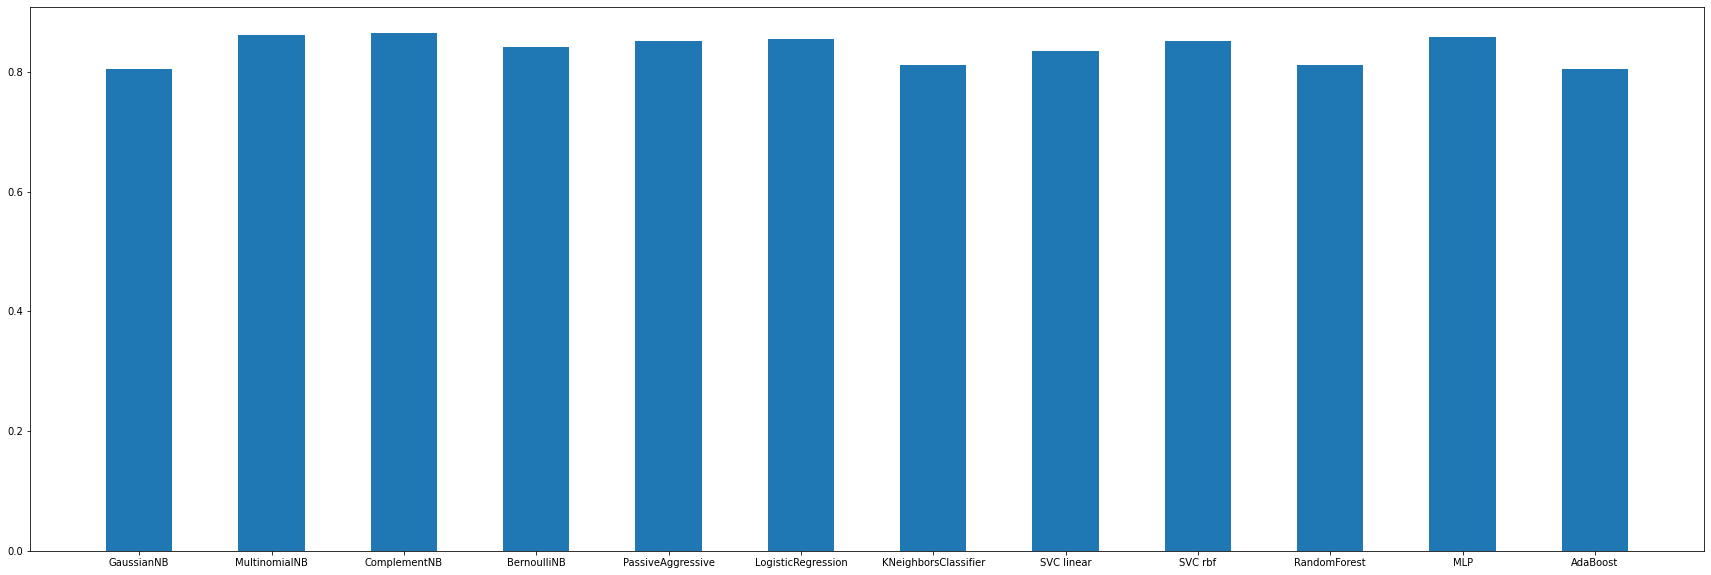

In [52]:
plt.figure(figsize=(30, 10))
plt.bar(*zip(*scores.items()), width = 0.5)
plt.show()

In [53]:
scores

{'AdaBoost': 0.805921052631579,
 'BernoulliNB': 0.8421052631578947,
 'ComplementNB': 0.8651315789473685,
 'GaussianNB': 0.805921052631579,
 'KNeighborsClassifier': 0.8125,
 'LogisticRegression': 0.8552631578947368,
 'MLP': 0.8585526315789473,
 'MultinomialNB': 0.8618421052631579,
 'PassiveAggressive': 0.8519736842105263,
 'RandomForest': 0.8125,
 'SVC linear': 0.8355263157894737,
 'SVC rbf': 0.8519736842105263}

Complement Naive Bayes Classifer gives the best accuracy score of 0.8651

###MLP Finding Hyper Parameters

In [54]:
#from sklearn.model_selection import GridSearchCV

#param_list = {"hidden_layer_sizes": [(10), (100), (10,10), (100,10)], "activation": ["identity", "logistic", "tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.0005]}
#grid = GridSearchCV(estimator=MLPClassifier(max_iter = 1000), param_grid=param_list)
#grid.fit(training_data, train_label)

#grid.best_params_


#####Output

{'activation': 'relu',
 'alpha': 5e-05,
 'hidden_layer_sizes': 100,
 'solver': 'lbfgs'}